In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Data Exploration and Preprocessing

In [193]:
# Load the data
data = pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv')
data

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,D2889,C112,17.1,Clear and Sunny,13.3,61,1017.0,0.0,57,3,17.1,10.0,1.0,22.2,1,05:49 AM,05:51 PM
2889,D2890,C112,17.4,NaN,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,05:49 AM,05:52 PM
2890,D2891,C112,19.2,NaN,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,05:48 AM,05:52 PM
2891,D2892,C112,19.2,NaN,14.4,76,1017.0,0.0,45,2,19.2,10.0,1.0,24.9,2,05:47 AM,05:52 PM


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   object 
 2   temperature_celsius       2893 non-null   float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  2893 non-null   float64
 5   wind_degree               2893 non-null   int64  
 6   pressure_mb               2893 non-null   float64
 7   precip_mm                 2893 non-null   float64
 8   humidity                  2893 non-null   int64  
 9   cloud                     2893 non-null   int64  
 10  feels_like_celsius        2893 non-null   float64
 11  visibility_km             2893 non-null   float64
 12  uv_index                  2893 non-null   float64
 13  gust_kph                  2893 non-null   float64
 14  air_qual

In [4]:
data.describe()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,22.024577,10.304805,158.994469,1013.745938,0.165299,74.773591,32.073280,23.725752,9.745524,2.216730,16.930522,1.599032
std,6.615540,7.264472,103.021634,6.172045,0.937061,19.335724,32.584184,8.877424,2.489918,2.238163,10.541449,1.062513
min,-2.000000,3.600000,1.000000,982.000000,0.000000,4.000000,0.000000,-4.300000,0.000000,1.000000,0.700000,1.000000
25%,17.000000,5.000000,70.000000,1010.000000,0.000000,66.000000,0.000000,17.000000,10.000000,1.000000,9.000000,1.000000
50%,22.000000,8.300000,150.000000,1014.000000,0.000000,78.000000,25.000000,24.500000,10.000000,1.000000,15.100000,1.000000
75%,27.000000,13.000000,236.000000,1018.000000,0.000000,89.000000,68.000000,30.000000,10.000000,1.000000,22.300000,2.000000
max,45.000000,74.200000,360.000000,1036.000000,28.700000,100.000000,100.000000,73.600000,32.000000,10.000000,75.600000,6.000000


In [194]:
# Set 'day_id' as the index
data.set_index('day_id', inplace=True)
data

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
day_id,,,,,,,,,,,,,,,,
D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D2889,C112,17.1,Clear and Sunny,13.3,61,1017.0,0.0,57,3,17.1,10.0,1.0,22.2,1,05:49 AM,05:51 PM
D2890,C112,17.4,NaN,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,05:49 AM,05:52 PM
D2891,C112,19.2,NaN,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,05:48 AM,05:52 PM


# Feature engineering

In [49]:
data

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
day_id,,,,,,,,,,,,,,,,
D0001,0,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
D0002,0,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
D0003,0,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
D0004,0,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
D0005,0,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D2889,111,17.1,Clear and Sunny,13.3,61,1017.0,0.0,57,3,17.1,10.0,1.0,22.2,1,05:49 AM,05:51 PM
D2890,111,17.4,NaN,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,05:49 AM,05:52 PM
D2891,111,19.2,NaN,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,05:48 AM,05:52 PM


In [195]:
# creating day_length column

# Feature engineering
data['sunrise'] = pd.to_datetime(data['sunrise'], format='mixed')
data['sunset'] = pd.to_datetime(data['sunset'], format='mixed')
data['day_length'] = (data['sunset'] - data['sunrise']).dt.total_seconds() / 3600

In [209]:
data.head()

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,day_length
day_id,,,,,,,,,,,,,,,,,
D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,2024-06-21 06:04:00,2024-06-21 19:19:00,13.250000
D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,2024-06-21 06:05:00,2024-06-21 19:18:00,13.216667
D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,2024-06-21 06:05:00,2024-06-21 19:18:00,13.216667
D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,2024-06-21 06:06:00,2024-06-21 19:16:00,13.166667
D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,2024-06-21 06:07:00,2024-06-21 19:15:00,13.133333


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2893 entries, D0001 to D2893
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city_id                   2893 non-null   object        
 1   temperature_celsius       2893 non-null   float64       
 2   condition_text            479 non-null    object        
 3   wind_kph                  2893 non-null   float64       
 4   wind_degree               2893 non-null   int64         
 5   pressure_mb               2893 non-null   float64       
 6   precip_mm                 2893 non-null   float64       
 7   humidity                  2893 non-null   int64         
 8   cloud                     2893 non-null   int64         
 9   feels_like_celsius        2893 non-null   float64       
 10  visibility_km             2893 non-null   float64       
 11  uv_index                  2893 non-null   float64       
 12  gust_kph            

In [75]:
data.isnull().sum()

city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
day_length                     0
dtype: int64

array([[<Axes: title={'center': 'temperature_celsius'}>,
        <Axes: title={'center': 'wind_kph'}>,
        <Axes: title={'center': 'wind_degree'}>,
        <Axes: title={'center': 'pressure_mb'}>],
       [<Axes: title={'center': 'precip_mm'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'cloud'}>,
        <Axes: title={'center': 'feels_like_celsius'}>],
       [<Axes: title={'center': 'visibility_km'}>,
        <Axes: title={'center': 'uv_index'}>,
        <Axes: title={'center': 'gust_kph'}>,
        <Axes: title={'center': 'air_quality_us-epa-index'}>],
       [<Axes: title={'center': 'sunrise'}>,
        <Axes: title={'center': 'sunset'}>,
        <Axes: title={'center': 'day_length'}>, <Axes: >]], dtype=object)

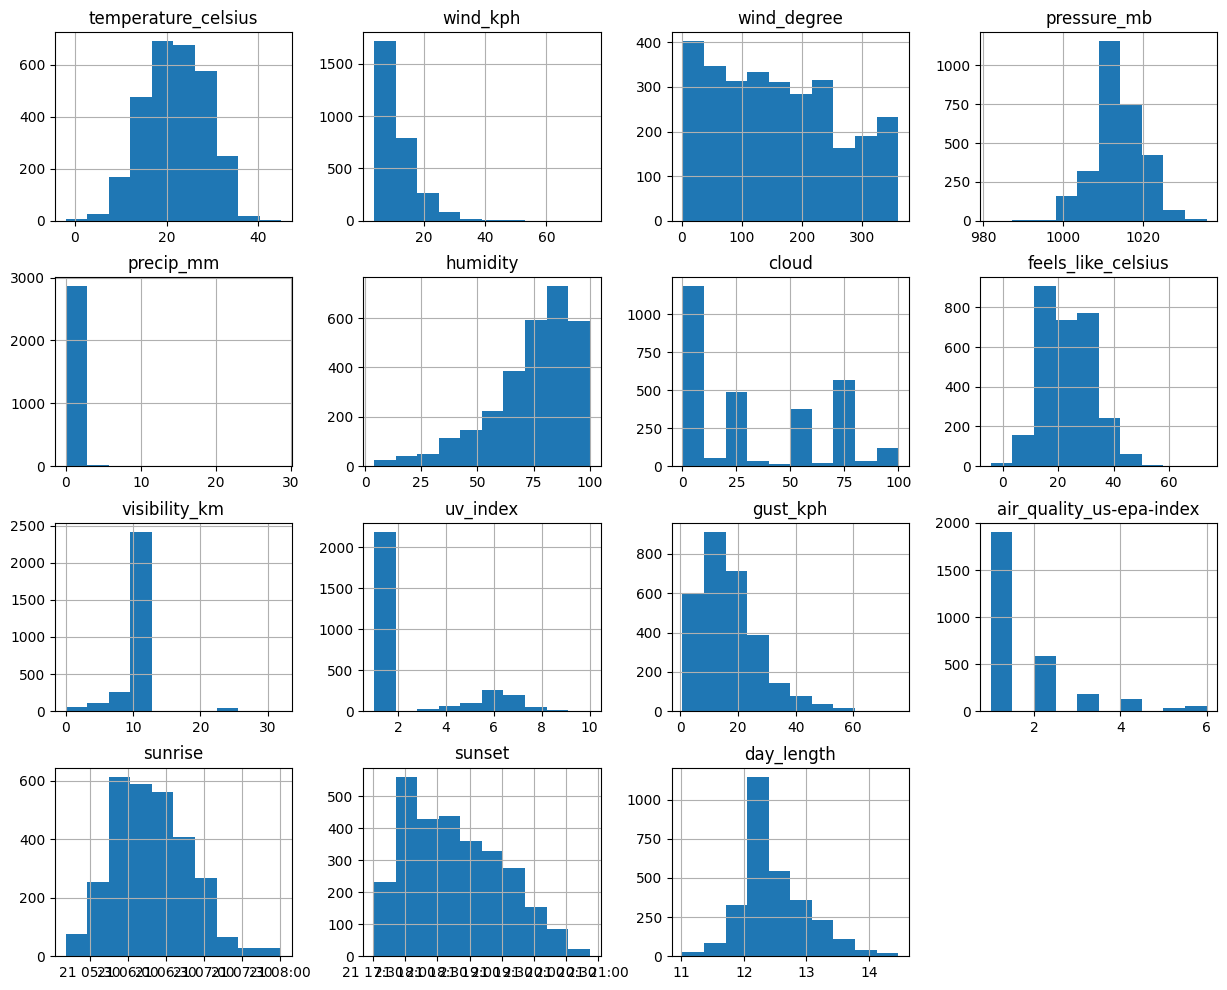

In [12]:
data.hist(figsize=(15,12))

## Target Distribution

In [5]:
data['condition_text'].value_counts()

condition_text
Clear and Sunny            122
Partly Cloudy              122
Light Precipitation         68
Cloudy and Overcast         53
Mist or Fog                 50
Rain Showers                21
Light Rain with Thunder     16
Thunderstorms               15
Moderate to Heavy Rain      12
Name: count, dtype: int64

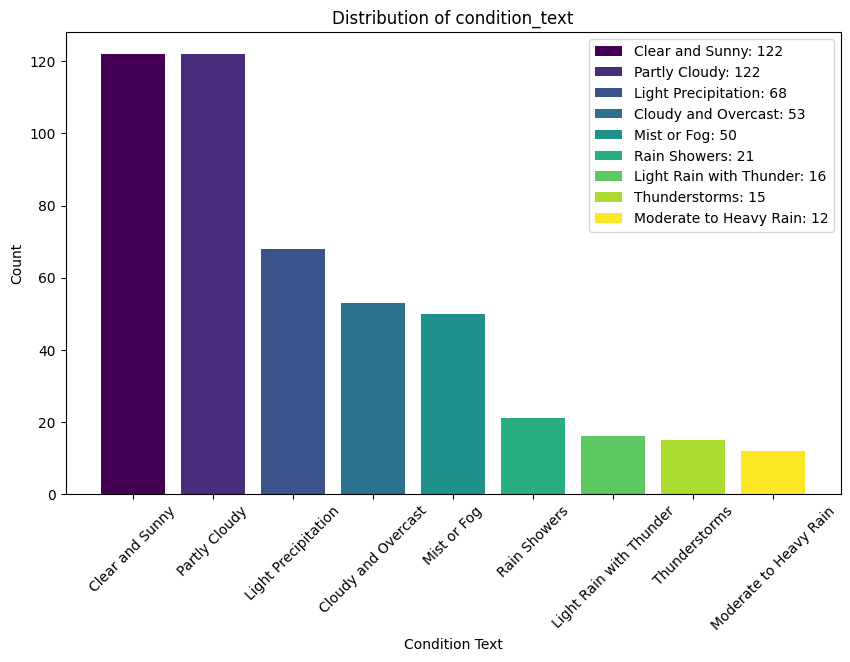

In [306]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame containing 'condition_text'
condition_counts = data['condition_text'].value_counts()

# Define colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(condition_counts)))

# Plotting the bar chart with different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(condition_counts.index, condition_counts.values, color=colors)

# Add labels and title
plt.title('Distribution of condition_text')
plt.xlabel('Condition Text')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed

# Add a legend for colors
legend_labels = [f'{index}: {value}' for index, value in zip(condition_counts.index, condition_counts.values)]
plt.legend(bars, legend_labels, loc='best')

plt.show()

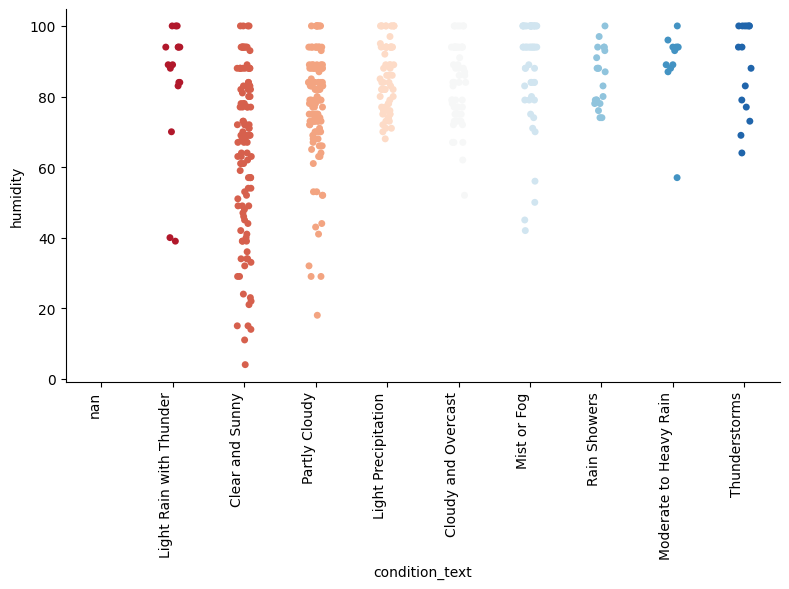

In [89]:
# Create the plot
g = sns.catplot(x='condition_text', y='humidity', data=data, palette="RdBu", height=6, aspect=2)

# Adjust the size
g.fig.set_size_inches(8, 6)

# Rotate x-axis labels if needed
plt.xticks(rotation=90, ha='right')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [137]:
data.head()

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,day_length
day_id,,,,,,,,,,,,,,,,,
D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,2024-06-22 06:04:00,2024-06-22 19:19:00,13.250000
D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,2024-06-22 06:05:00,2024-06-22 19:18:00,13.216667
D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,2024-06-22 06:05:00,2024-06-22 19:18:00,13.216667
D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,2024-06-22 06:06:00,2024-06-22 19:16:00,13.166667
D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,2024-06-22 06:07:00,2024-06-22 19:15:00,13.133333


## Precipitation Preprocessing 

In [196]:
import pandas as pd

df = data
# Define the conditions
conditions = ['Moderate to Heavy Rain', 'Rain Showers','Light Precipitation','Light Rain with Thunder']

# Initialize a dictionary to hold the mean values
condition_means = {}

# Calculate the mean precipitation for each condition
for condition in conditions:
    condition_mean = df.loc[df['condition_text'] == condition, 'precip_mm'].mean()
    condition_means[condition] = condition_mean

# Replace zeros with the mean precipitation for each condition
for condition in conditions:
    df.loc[(df['condition_text'] == condition) & (df['precip_mm'] == 0), 'precip_mm'] = condition_means[condition]

# Count zeros for each condition
zero_counts = {}
for condition in conditions:
    zero_counts[condition] = ((df['condition_text'] == condition) & (df['precip_mm'] == 0)).sum()

# Print the results
print("Mean Precipitation for each condition:", condition_means)
print("Number of zeros for each condition after replacement:", zero_counts)

Mean Precipitation for each condition: {'Moderate to Heavy Rain': 2.8841666666666668, 'Rain Showers': 0.6219047619047618, 'Light Precipitation': 0.46, 'Light Rain with Thunder': 0.84375}
Number of zeros for each condition after replacement: {'Moderate to Heavy Rain': 0, 'Rain Showers': 0, 'Light Precipitation': 0, 'Light Rain with Thunder': 0}


In [197]:
data[data['condition_text'].isin(conditions)]

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,day_length
day_id,,,,,,,,,,,,,,,,,
D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.50000,100,75,20.0,10.0,1.0,12.6,1,2024-06-22 06:05:00,2024-06-22 19:18:00,13.216667
D0042,C002,25.0,Light Rain with Thunder,3.6,141,1016.0,0.84375,83,50,26.3,8.0,1.0,14.4,1,2024-06-22 06:27:00,2024-06-22 19:00:00,12.550000
D0079,C004,29.0,Light Precipitation,15.1,90,1015.0,0.30000,79,75,34.0,10.0,1.0,37.4,1,2024-06-22 05:53:00,2024-06-22 18:23:00,12.500000
D0128,C005,16.0,Light Precipitation,20.2,120,1014.0,0.08000,94,100,16.0,2.5,1.0,25.6,1,2024-06-22 06:47:00,2024-06-22 18:49:00,12.033333
D0146,C006,14.0,Light Precipitation,3.6,10,1017.0,0.46000,94,75,14.3,6.0,1.0,5.8,1,2024-06-22 06:39:00,2024-06-22 19:17:00,12.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D2520,C097,16.0,Moderate to Heavy Rain,11.2,210,1000.0,0.01000,94,75,16.0,10.0,1.0,14.1,1,2024-06-22 06:31:00,2024-06-22 18:48:00,12.283333
D2741,C107,15.0,Light Precipitation,6.8,130,1009.0,0.46000,94,100,15.8,10.0,1.0,3.6,1,2024-06-22 06:11:00,2024-06-22 19:50:00,13.650000
D2817,C110,24.0,Moderate to Heavy Rain,20.2,90,1011.0,3.00000,89,75,26.2,1.0,5.0,60.1,1,2024-06-22 05:56:00,2024-06-22 17:40:00,11.733333


## Encoding categorical variables 

In [198]:
# # Encode city_id
le_city = LabelEncoder()
data['city_id'] = le_city.fit_transform(data['city_id'])

In [199]:
# Encode target variable
data_non_missing = data[data['condition_text'].notna()].copy()
le_condition = LabelEncoder()
data_non_missing.loc[:, 'condition_text'] = le_condition.fit_transform(data_non_missing['condition_text'])
data_non_missing['condition_text'] = data_non_missing['condition_text'].astype(int)

## Correlation matrix 

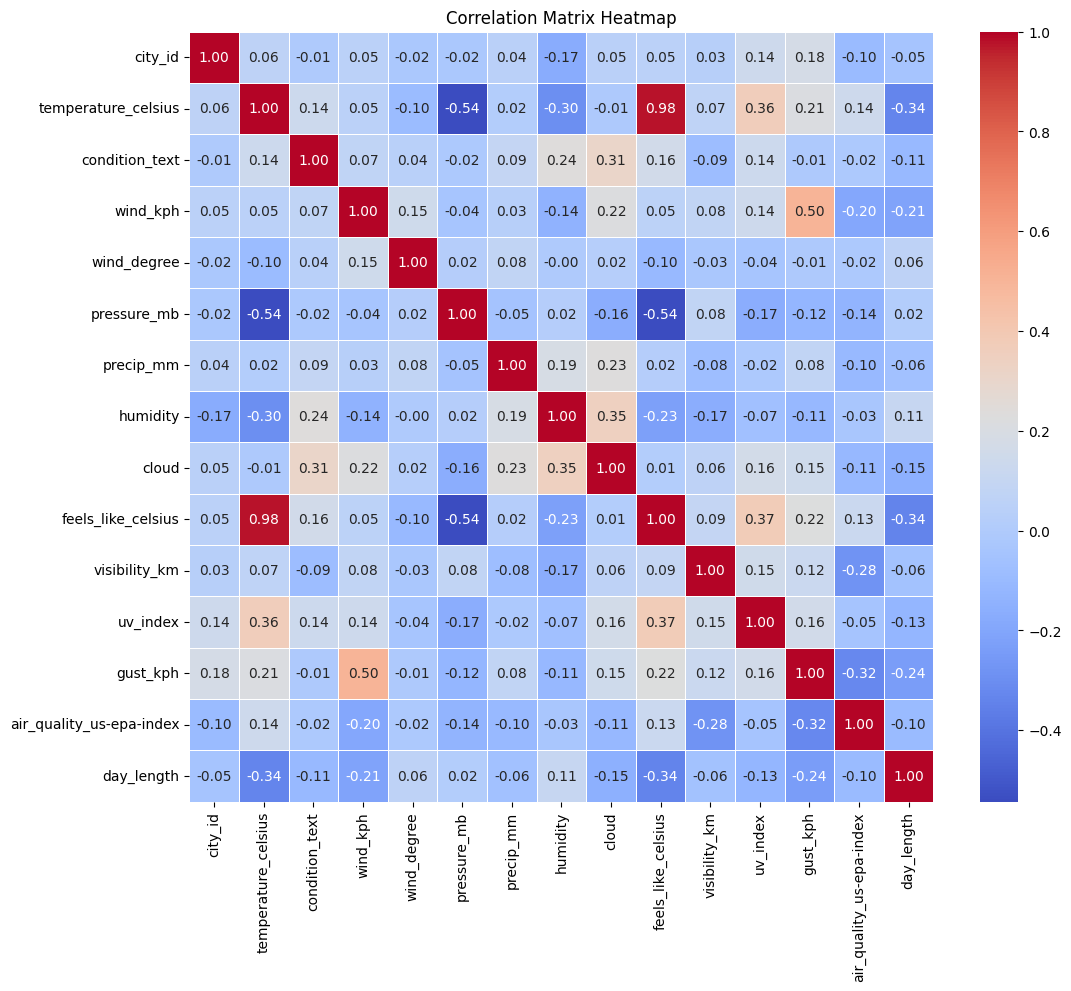

In [200]:
# Compute correlation matrix
corr_matrix = data_non_missing.select_dtypes(include=['number']).corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [229]:
# One-hot encode city_id
# data_non_missing = pd.get_dummies(data_non_missing, columns=['city_id'], prefix='city').astype(int)

In [181]:
data_non_missing

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,day_length
day_id,,,,,,,,,,,,,,,,,
D0003,0,20.0,3,3.6,10,1011.0,4.50,100,75,20.0,10.0,1.0,12.6,1,2024-06-22 06:05:00,2024-06-22 19:18:00,13.216667
D0004,0,17.0,0,6.1,150,1018.0,0.00,88,0,17.0,10.0,1.0,11.2,1,2024-06-22 06:06:00,2024-06-22 19:16:00,13.166667
D0007,0,21.0,6,4.0,310,1015.0,0.00,100,50,21.0,10.0,1.0,15.1,2,2024-06-22 06:08:00,2024-06-22 19:11:00,13.050000
D0019,0,19.0,0,3.6,64,1017.0,0.00,88,0,19.0,10.0,1.0,8.3,3,2024-06-22 06:20:00,2024-06-22 18:51:00,12.516667
D0028,1,19.0,6,3.6,83,1010.0,0.00,73,25,19.0,10.0,1.0,8.3,1,2024-06-22 06:17:00,2024-06-22 19:20:00,13.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D2839,109,27.0,6,19.1,90,1014.0,0.01,70,25,29.8,10.0,6.0,45.6,1,2024-06-22 05:39:00,2024-06-22 17:43:00,12.066667
D2864,110,21.4,2,3.6,178,1012.0,0.00,89,75,21.4,10.0,6.0,6.6,1,2024-06-22 06:17:00,2024-06-22 18:25:00,12.133333
D2874,111,16.9,0,16.6,68,1018.0,0.00,44,2,16.9,10.0,1.0,27.0,1,2024-06-22 06:02:00,2024-06-22 17:49:00,11.783333


In [275]:
data_non_missing['condition_text'].value_counts()

condition_text
0    122
6    122
2     68
1     53
4     50
7     21
3     16
8     15
5     12
Name: count, dtype: int64

In [119]:
data_non_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, D0003 to D2889
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city_id                   479 non-null    int64         
 1   temperature_celsius       479 non-null    float64       
 2   condition_text            479 non-null    object        
 3   wind_kph                  479 non-null    float64       
 4   wind_degree               479 non-null    int64         
 5   pressure_mb               479 non-null    float64       
 6   precip_mm                 479 non-null    float64       
 7   humidity                  479 non-null    int64         
 8   cloud                     479 non-null    int64         
 9   feels_like_celsius        479 non-null    float64       
 10  visibility_km             479 non-null    float64       
 11  uv_index                  479 non-null    float64       
 12  gust_kph             

## Data Splitting 

In [201]:
# Prepare training data
X = data_non_missing.drop(columns=['condition_text', 'sunrise', 'sunset'])
y = data_non_missing['condition_text'].astype(int)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

## Oversampling

In [202]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply the oversampler to the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Verify the class distribution after resampling
print(pd.Series(y_train_resampled).value_counts())

condition_text
6    110
7    110
2    110
4    110
0    110
8    110
1    110
3    110
5    110
Name: count, dtype: int64


## Scaling 

In [203]:
# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

In [204]:
from sklearn.utils.class_weight import compute_class_weight

# Compute unique classes from y_train
unique_classes = sorted(set(y_train))

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Model Training

## Random Forest

In [218]:
# Model training with RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1, max_depth=30, n_estimators=180, class_weight=class_weights_dict)
rf_model.fit(X_train_scaled, y_train_resampled)

# Model evaluation

y_pred_train = rf_model.predict(X_train_scaled)
print("Train Accuracy:", accuracy_score(y_train_resampled, y_pred_train))

y_pred_test = rf_model.predict(X_val_scaled)
print("Test Accuracy:", accuracy_score(y_val, y_pred_test))

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Print cross-validation scores and mean
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

print("Classification Report:")
print(classification_report(y_val, y_pred_test, target_names=le_condition.classes_))

Train Accuracy: 1.0
Test Accuracy: 0.7916666666666666
Cross-validation scores: [0.67816092 0.75581395 0.72093023 0.73255814 0.79069767]
Mean cross-validation score: 0.735632183908046
Classification Report:
                         precision    recall  f1-score   support

        Clear and Sunny       0.86      1.00      0.92        12
    Cloudy and Overcast       0.83      1.00      0.91         5
    Light Precipitation       0.50      0.71      0.59         7
Light Rain with Thunder       0.00      0.00      0.00         2
            Mist or Fog       1.00      0.60      0.75         5
 Moderate to Heavy Rain       0.00      0.00      0.00         1
          Partly Cloudy       0.86      1.00      0.92        12
           Rain Showers       1.00      0.50      0.67         2
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.79        48
              macro avg       0.56      0.53      0.53        48
           w

# HyperParameter Tuning

In [67]:
# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [30, 50, 120],
    'classifier__max_depth': [3, 5, 10],
    'classifier__min_samples_split': [1, 2, 3],
    'classifier__min_samples_leaf': [1, 2, 5],
}

# Stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train accuracy
y_train_pred = best_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

# Validation accuracy
y_val_pred = best_model.predict(X_val)
print("Test Accuracy:", accuracy_score(y_val, y_val_pred))

print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le_condition.classes_))

# Precision-recall curve
# precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred)

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 120}
Train Accuracy: 0.9721577726218097
Test Accuracy: 0.7083333333333334
Classification Report:
                         precision    recall  f1-score   support

        Clear and Sunny       0.79      0.92      0.85        12
    Cloudy and Overcast       0.50      0.80      0.62         5
    Light Precipitation       0.80      0.57      0.67         7
Light Rain with Thunder       0.00      0.00      0.00         2
            Mist or Fog       0.50      0.40      0.44         5
 Moderate to Heavy Rain       0.00      0.00      0.00         1
          Partly Cloudy       0.77      0.83      0.80        12
           Rain Showers       1.00      1.00      1.00         2
          Thunderstorms       0.50      0.50      0.50         2

               accuracy                           0.71        48
              macro avg       0.54      

In [152]:
best_model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=2, n_estimators=150,
                                        random_state=42))])

# Confusion Matrix

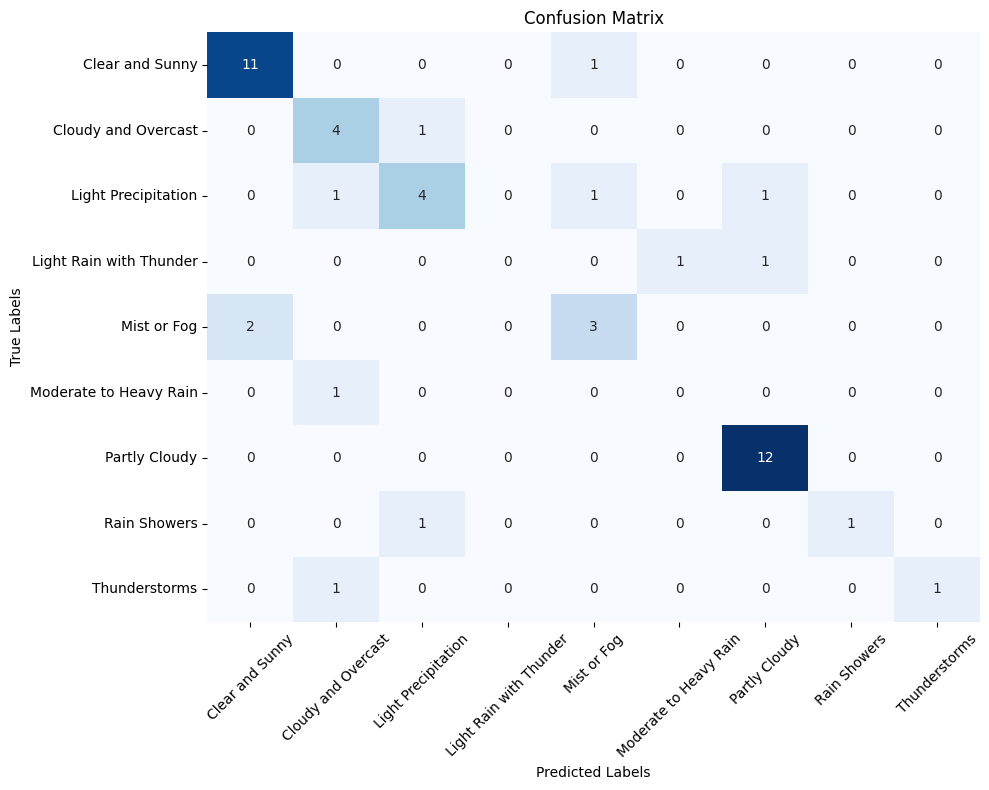

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred)

# Define labels for clarity
class_names = le_condition.classes_

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


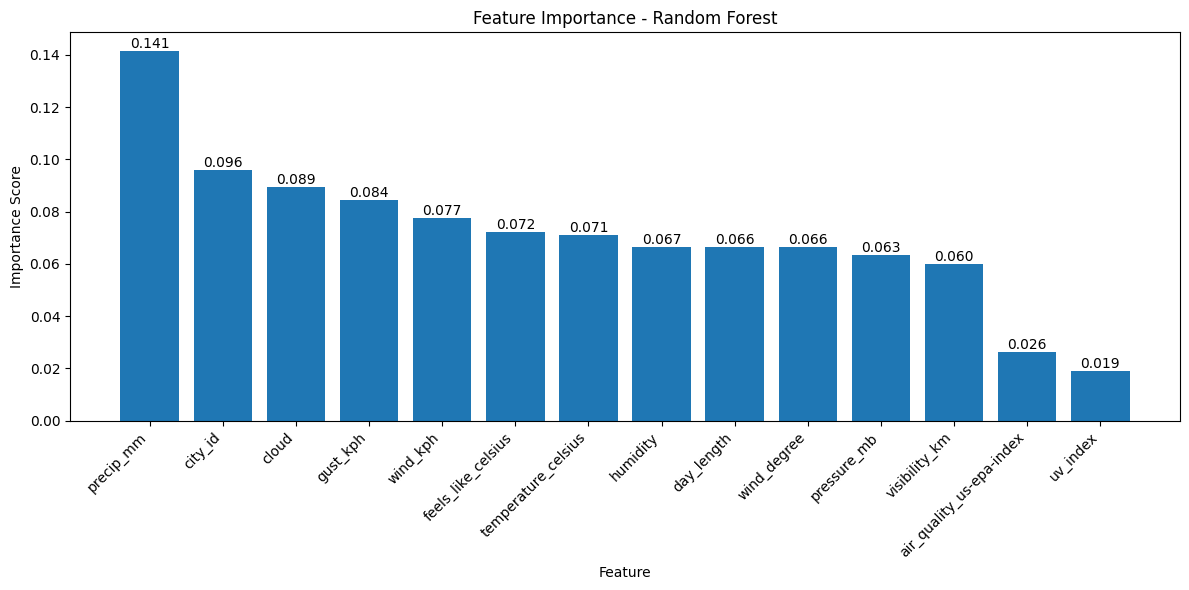

In [220]:
# Feature importance
feature_importance = rf_model.feature_importances_
# Sorting indices of feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
# Get feature names for plotting (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Plotting feature importance
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Random Forest')

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Model training with SVM
svm_model = SVC(kernel = 'rbf', random_state=1)
svm_model.fit(X_train_scaled, y_train_resampled)

# Model evaluation
y_pred = svm_model.predict(X_train_scaled)
print("Train Accuracy (SVM):", accuracy_score(y_train, y_pred))

y_pred = svm_model.predict(X_val_scaled)
print("Test Accuracy (SVM):", accuracy_score(y_val, y_pred))

print("Classification Report (SVM):")
print(classification_report(y_val, y_pred, target_names=le_condition.classes_))

## Gradient Boosting Classifier

In [258]:
from sklearn.ensemble import GradientBoostingClassifier

# Model training with Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=1, n_estimators=80)
gb_model.fit(X_train_scaled, y_train_resampled)

# Model evaluation
y_pred = gb_model.predict(X_train_scaled)
print("Train Accuracy (Gradient Boosting):", accuracy_score(y_train_resampled, y_pred))

y_pred = gb_model.predict(X_val_scaled)
print("Test Accuracy (Gradient Boosting):", accuracy_score(y_val, y_pred))

# Cross-validation
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)

# Print cross-validation scores and mean
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

print("Classification Report (Gradient Boosting):")
print(classification_report(y_val, y_pred, target_names=le_condition.classes_))

Train Accuracy (Gradient Boosting): 1.0
Test Accuracy (Gradient Boosting): 0.8125
Cross-validation scores: [0.70114943 0.74418605 0.75581395 0.80232558 0.77906977]
Mean cross-validation score: 0.7565089548249132
Classification Report (Gradient Boosting):
                         precision    recall  f1-score   support

        Clear and Sunny       0.80      1.00      0.89        12
    Cloudy and Overcast       0.80      0.80      0.80         5
    Light Precipitation       0.67      0.86      0.75         7
Light Rain with Thunder       0.67      1.00      0.80         2
            Mist or Fog       0.67      0.40      0.50         5
 Moderate to Heavy Rain       0.00      0.00      0.00         1
          Partly Cloudy       1.00      0.92      0.96        12
           Rain Showers       1.00      0.50      0.67         2
          Thunderstorms       1.00      0.50      0.67         2

               accuracy                           0.81        48
              macro avg     

In [13]:
# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [60, 100],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5, 7],
   
}

# Stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train accuracy
y_train_pred = best_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

# Validation accuracy
y_val_pred = best_model.predict(X_val)
print("Test Accuracy:", accuracy_score(y_val, y_val_pred))

print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le_condition.classes_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 60}
Train Accuracy: 0.9930394431554525
Test Accuracy: 0.7291666666666666
Classification Report:
                         precision    recall  f1-score   support

        Clear and Sunny       0.85      0.92      0.88        12
    Cloudy and Overcast       0.50      0.60      0.55         5
    Light Precipitation       0.67      0.57      0.62         7
Light Rain with Thunder       0.50      0.50      0.50         2
            Mist or Fog       0.60      0.60      0.60         5
 Moderate to Heavy Rain       0.00      0.00      0.00         1
          Partly Cloudy       0.83      0.83      0.83        12
           Rain Showers       0.67      1.00      0.80         2
          Thunderstorms       1.00      0.50      0.67         2

               accuracy                           0.73        48
              macr

## Feature Importance 

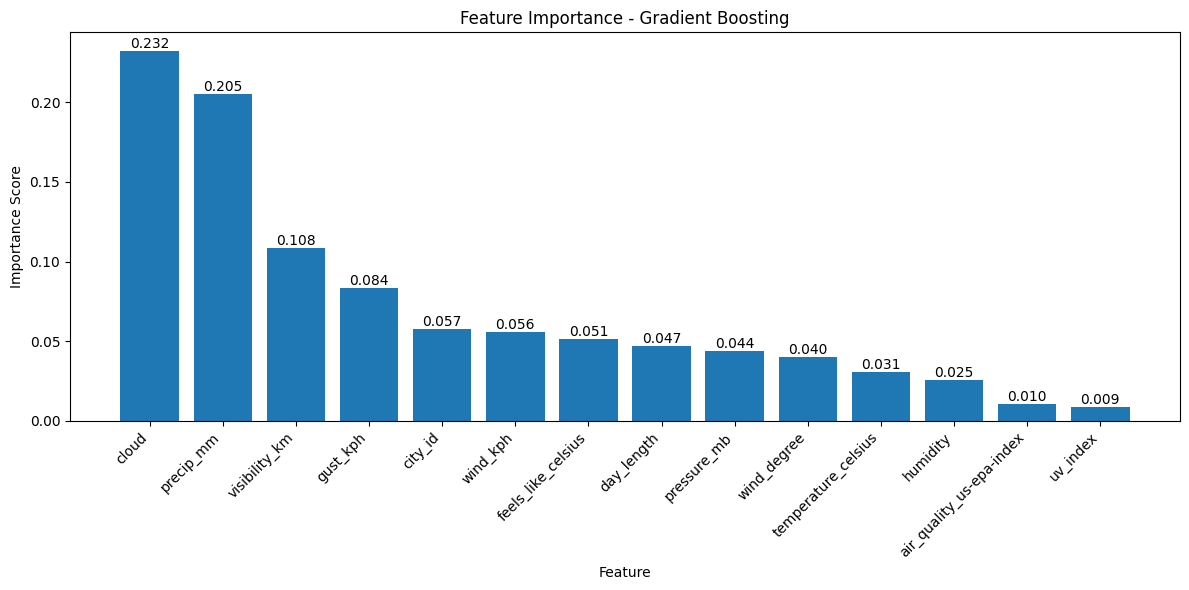

In [250]:
# Feature importance
feature_importance = gb_model.feature_importances_
# Sorting indices of feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
# Get feature names for plotting (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Plotting feature importance
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Gradient Boosting')

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

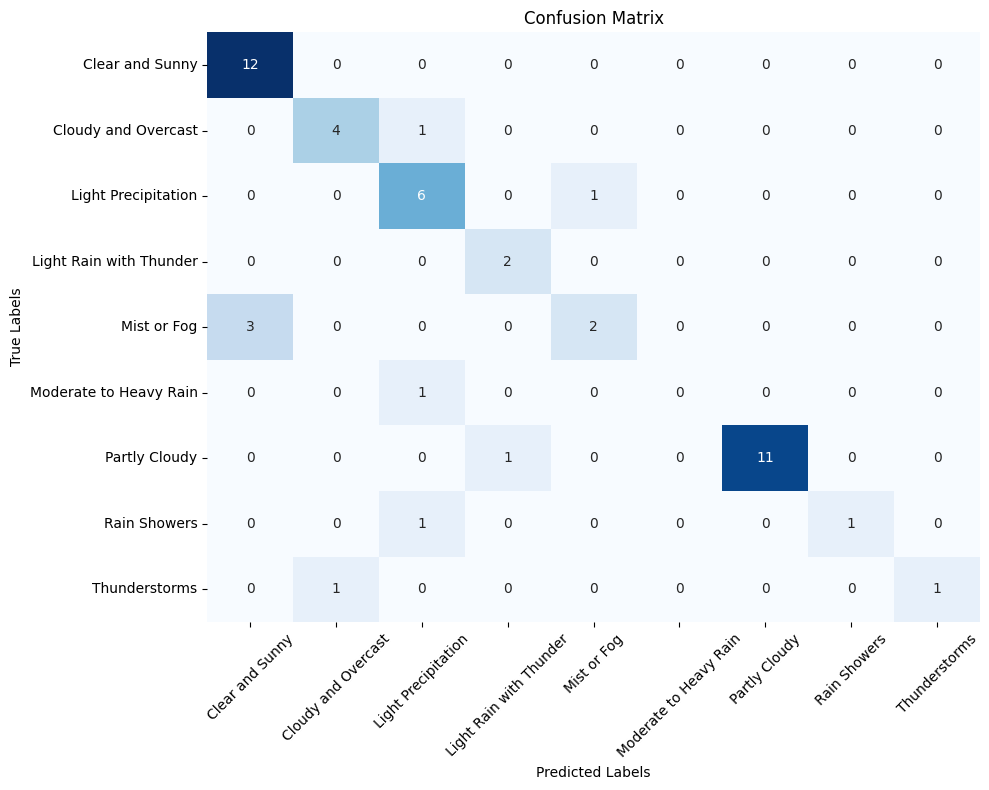

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred)

# Define labels for clarity
class_names = le_condition.classes_

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Model training with Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Model evaluation
y_train_pred = nb_model.predict(X_train_scaled)
print("Train Accuracy (Naive Bayes):", accuracy_score(y_train, y_train_pred))

y_val_pred = nb_model.predict(X_val_scaled)
print("Test Accuracy (Naive Bayes):", accuracy_score(y_val, y_val_pred))

print("Classification Report (Naive Bayes):")
print(classification_report(y_val, y_val_pred, target_names=le_condition.classes_))

Train Accuracy (Naive Bayes): 0.6357308584686775
Test Accuracy (Naive Bayes): 0.5208333333333334
Classification Report (Naive Bayes):
                         precision    recall  f1-score   support

        Clear and Sunny       0.75      0.75      0.75        12
    Cloudy and Overcast       0.33      0.60      0.43         5
    Light Precipitation       0.60      0.43      0.50         7
Light Rain with Thunder       0.00      0.00      0.00         2
            Mist or Fog       0.40      0.40      0.40         5
 Moderate to Heavy Rain       0.00      0.00      0.00         1
          Partly Cloudy       0.67      0.50      0.57        12
           Rain Showers       0.33      1.00      0.50         2
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.52        48
              macro avg       0.34      0.41      0.35        48
           weighted avg       0.53      0.52      0.51        48



## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier()))
])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__base_estimator__max_depth': [1, 2, 4],
    'classifier__base_estimator__min_samples_split': [2, 5, 10],
    'classifier__base_estimator__min_samples_leaf': [1, 2, 4]
}

# Stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5)

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train accuracy
y_train_pred = best_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

# Validation accuracy
y_val_pred = best_model.predict(X_val)
print("Test Accuracy:", accuracy_score(y_val, y_val_pred))

print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le_condition.classes_))


# Neural Networks

In [44]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Handling imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Convert labels to categorical
y_train_resampled_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train_resampled_cat,
                    validation_data=(X_val_scaled, y_val_cat),
                    epochs=500,
                    batch_size=50,
                    callbacks=[early_stopping])


Epoch 1/500
1/9 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.1400 - loss: 2.2371

W0000 00:00:1719039739.311902     298 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 557ms/step - accuracy: 0.1396 - loss: 2.2176 - val_accuracy: 0.1458 - val_loss: 2.1586
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2160 - loss: 2.1175 - val_accuracy: 0.2708 - val_loss: 2.0763
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2689 - loss: 2.0365 - val_accuracy: 0.2917 - val_loss: 2.0052
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3241 - loss: 1.9543 - val_accuracy: 0.3125 - val_loss: 1.9416
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3643 - loss: 1.9028 - val_accuracy: 0.3333 - val_loss: 1.8870
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3891 - loss: 1.8427 - val_accuracy: 0.4167 - val_loss: 1.8386
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4230 - loss: 1.7787 - val_accuracy: 0.4167 - val_loss: 1.7944
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4111 - loss: 1.7612 - val_accuracy: 0.4375 - val_loss: 1.7542
Epoch 9/50

In [45]:
# Evaluate the model
y_train_pred = np.argmax(model.predict(X_train_scaled), axis=1)
y_val_pred = np.argmax(model.predict(X_val_scaled), axis=1)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le_condition.classes_))


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Train Accuracy: 0.777262180974478
Validation Accuracy: 0.625
Classification Report:
                         precision    recall  f1-score   support

        Clear and Sunny       0.79      0.92      0.85        12
    Cloudy and Overcast       0.40      0.40      0.40         5
    Light Precipitation       0.45      0.71      0.56         7
Light Rain with Thunder       0.00      0.00      0.00         2
            Mist or Fog       0.75      0.60      0.67         5
 Moderate to Heavy Rain       0.00      0.00      0.00         1
          Partly Cloudy       0.64      0.75      0.69        12
           Rain Showers       0.00      0.00      0.00         2
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.62        48
              macro avg       0.34      0.38      0.35        48
           weighted avg       0.54      0.62      0.58 

In [41]:
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train_scaled and X_val_scaled are already defined

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize HMMs for each class
hmm_models = {}

# Assuming y_train is the target variable containing class labels
unique_classes = np.unique(y_train)

for cls in unique_classes:
    # Extract sequences for the current class
    X_cls = X_train_scaled[y_train == cls]
    
    # Fit GaussianHMM
    hmm_model = GaussianHMM(n_components=5)  # Adjust n_components as needed
    hmm_model.fit(X_cls)
    
    # Store the model
    hmm_models[cls] = hmm_model

# Predict using the models
y_val_pred = []
for x in X_val_scaled:
    # Calculate likelihoods under each model
    likelihoods = {cls: hmm_model.score(x.reshape(1, -1)) for cls, hmm_model in hmm_models.items()}
    
    # Assign the class with the highest likelihood
    pred_class = max(likelihoods, key=likelihoods.get)
    y_val_pred.append(pred_class)

# Convert predictions to numpy array
y_val_pred = np.array(y_val_pred)

# Evaluate the model
print("Test Accuracy (HMM):", accuracy_score(y_val, y_val_pred))
print("Classification Report (HMM):")
print(classification_report(y_val, y_val_pred, target_names=le_condition.classes_))

Test Accuracy (HMM): 0.3125
Classification Report (HMM):
                         precision    recall  f1-score   support

        Clear and Sunny       0.70      0.58      0.64        12
    Cloudy and Overcast       0.50      0.40      0.44         5
    Light Precipitation       0.25      0.14      0.18         7
Light Rain with Thunder       0.00      0.00      0.00         2
            Mist or Fog       0.20      0.40      0.27         5
 Moderate to Heavy Rain       0.00      0.00      0.00         1
          Partly Cloudy       1.00      0.08      0.15        12
           Rain Showers       0.11      1.00      0.19         2
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.31        48
              macro avg       0.31      0.29      0.21        48
           weighted avg       0.54      0.31      0.31        48



## Prediction

In [252]:
data = pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv')

data.set_index('day_id', inplace=True)

data['sunrise'] = pd.to_datetime(data['sunrise'], format='mixed')
data['sunset'] = pd.to_datetime(data['sunset'], format='mixed')
data['day_length'] = (data['sunset'] - data['sunrise']).dt.total_seconds() / 3600

data['city_id'] = le_city.fit_transform(data['city_id'])

# Step 1: Prepare the data for prediction
X_missing = data[data['condition_text'].isnull()].drop('condition_text', axis=1)

# Scale features
scaler = MinMaxScaler()
X_missing = scaler.fit_transform(X_missing.drop(columns=['sunrise', 'sunset']))

# Step 2: Predict the missing values
y_pred_missing = gb_model.predict(X_missing)

# Step 3: Assign the predicted values back to the dataframe
data.loc[data['condition_text'].isnull(), 'condition_text'] = y_pred_missing

# Step 5: Check if all missing values are filled
print("Number of missing values after prediction:", data['condition_text'].isnull().sum())


Number of missing values after prediction: 0


In [253]:
label_mapping = dict(zip(le_condition.transform(le_condition.classes_), le_condition.classes_))
label_mapping

{0: 'Clear and Sunny',
 1: 'Cloudy and Overcast',
 2: 'Light Precipitation',
 3: 'Light Rain with Thunder',
 4: 'Mist or Fog',
 5: 'Moderate to Heavy Rain',
 6: 'Partly Cloudy',
 7: 'Rain Showers',
 8: 'Thunderstorms'}

In [419]:
data

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,day_length
day_id,,,,,,,,,,,,,,,,,
D0001,0,27.0,Partly Cloudy,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,2024-06-21 06:04:00,2024-06-21 19:19:00,13.250000
D0002,0,22.0,Partly Cloudy,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,2024-06-21 06:05:00,2024-06-21 19:18:00,13.216667
D0003,0,20.0,NaN,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,2024-06-21 06:05:00,2024-06-21 19:18:00,13.216667
D0004,0,17.0,NaN,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,2024-06-21 06:06:00,2024-06-21 19:16:00,13.166667
D0005,0,18.0,Clear and Sunny,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,2024-06-21 06:07:00,2024-06-21 19:15:00,13.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D2889,111,17.1,NaN,13.3,61,1017.0,0.0,57,3,17.1,10.0,1.0,22.2,1,2024-06-21 05:49:00,2024-06-21 17:51:00,12.033333
D2890,111,17.4,Clear and Sunny,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,2024-06-21 05:49:00,2024-06-21 17:52:00,12.050000
D2891,111,19.2,Clear and Sunny,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,2024-06-21 05:48:00,2024-06-21 17:52:00,12.066667


In [254]:
# Reverse label encoding for numeric values
def reverse_label_encoding(value):
    if isinstance(value, int):
        return le_condition.inverse_transform([value])[0]
    else:
        return value
    
    # Reverse the label encoding to original text
data['condition_text'] = data['condition_text'].apply(reverse_label_encoding)
data['condition_text']

day_id
D0001              Partly Cloudy
D0002              Partly Cloudy
D0003    Light Rain with Thunder
D0004            Clear and Sunny
D0005            Clear and Sunny
                  ...           
D2889            Clear and Sunny
D2890            Clear and Sunny
D2891            Clear and Sunny
D2892            Clear and Sunny
D2893            Clear and Sunny
Name: condition_text, Length: 2893, dtype: object

In [255]:
final_df = data.reset_index()
final_df = final_df[['day_id','condition_text']]
final_df

,day_id,condition_text
0,D0001,Partly Cloudy
1,D0002,Partly Cloudy
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,Clear and Sunny
...,...,...
2888,D2889,Clear and Sunny
2889,D2890,Clear and Sunny
2890,D2891,Clear and Sunny
2891,D2892,Clear and Sunny


In [256]:
# Step 4: Save the updated dataframe to a new CSV file
final_df.to_csv('final_daily_data.csv', index=False)

print("Final CSV file saved successfully.")

Final CSV file saved successfully.


## Logistic Regression

In [324]:
from sklearn.linear_model import LogisticRegression

# Model training with Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Model evaluation
y_pred = lr_model.predict(X_train)
print("Train Accuracy (Logistic Regression):", accuracy_score(y_train, y_pred))

y_pred = lr_model.predict(X_val)
print("Test Accuracy (Logistic Regression):", accuracy_score(y_val, y_pred))

print("Classification Report (Logistic Regression):")
print(classification_report(y_val, y_pred, target_names=le_condition.classes_))

Train Accuracy (Logistic Regression): 0.6265356265356266
Test Accuracy (Logistic Regression): 0.5833333333333334
Classification Report (Logistic Regression):
                         precision    recall  f1-score   support

        Clear and Sunny       0.68      0.94      0.79        18
    Cloudy and Overcast       0.58      0.88      0.70         8
    Light Precipitation       0.42      0.50      0.45        10
Light Rain with Thunder       0.00      0.00      0.00         3
            Mist or Fog       0.33      0.12      0.18         8
 Moderate to Heavy Rain       0.00      0.00      0.00         2
          Partly Cloudy       0.60      0.67      0.63        18
           Rain Showers       0.00      0.00      0.00         3
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.58        72
              macro avg       0.29      0.35      0.31        72
           weighted avg       0.48      0.58      0.52      

## K-Nearest Neighbors (KNN)

In [325]:
from sklearn.neighbors import KNeighborsClassifier

# Model training with KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Model evaluation
y_pred = knn_model.predict(X_train)
print("Train Accuracy (KNN):", accuracy_score(y_train, y_pred))

y_pred = knn_model.predict(X_val)
print("Test Accuracy (KNN):", accuracy_score(y_val, y_pred))

print("Classification Report (KNN):")
print(classification_report(y_val, y_pred, target_names=le_condition.classes_))

Train Accuracy (KNN): 0.6658476658476659
Test Accuracy (KNN): 0.5138888888888888
Classification Report (KNN):
                         precision    recall  f1-score   support

        Clear and Sunny       0.64      1.00      0.78        18
    Cloudy and Overcast       0.62      0.62      0.62         8
    Light Precipitation       0.42      0.50      0.45        10
Light Rain with Thunder       0.00      0.00      0.00         3
            Mist or Fog       0.00      0.00      0.00         8
 Moderate to Heavy Rain       0.00      0.00      0.00         2
          Partly Cloudy       0.43      0.50      0.46        18
           Rain Showers       0.00      0.00      0.00         3
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.51        72
              macro avg       0.23      0.29      0.26        72
           weighted avg       0.40      0.51      0.44        72



## CatBoost Classifier

In [327]:
from catboost import CatBoostClassifier

# Model training with CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Model evaluation
y_pred = catboost_model.predict(X_train)
print("Train Accuracy (CatBoost):", accuracy_score(y_train, y_pred))

y_pred = catboost_model.predict(X_val)
print("Test Accuracy (CatBoost):", accuracy_score(y_val, y_pred))

print("Classification Report (CatBoost):")
print(classification_report(y_val, y_pred, target_names=le_condition.classes_))

Train Accuracy (CatBoost): 1.0
Test Accuracy (CatBoost): 0.7222222222222222
Classification Report (CatBoost):
                         precision    recall  f1-score   support

        Clear and Sunny       0.81      0.94      0.87        18
    Cloudy and Overcast       0.67      0.75      0.71         8
    Light Precipitation       0.67      0.80      0.73        10
Light Rain with Thunder       0.00      0.00      0.00         3
            Mist or Fog       0.67      0.50      0.57         8
 Moderate to Heavy Rain       0.00      0.00      0.00         2
          Partly Cloudy       0.71      0.94      0.81        18
           Rain Showers       0.00      0.00      0.00         3
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.72        72
              macro avg       0.39      0.44      0.41        72
           weighted avg       0.62      0.72      0.66        72



## XGBoost Classifier

In [328]:
import xgboost as xgb

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(le_condition.classes_),  # Number of classes
    'eval_metric': 'merror',  # Evaluation metric: Multi-class classification error rate
    'random_state': 42,
    'verbosity': 0  # Set verbosity to 0 to suppress messages
}

# Train XGBoost model
xgb_model = xgb.train(params, dtrain)

# Predictions on training set
y_pred_train = xgb_model.predict(dtrain)
print("Train Accuracy (XGBoost):", accuracy_score(y_train, y_pred_train))

# Predictions on validation set
y_pred_val = xgb_model.predict(dval)
print("Test Accuracy (XGBoost):", accuracy_score(y_val, y_pred_val))

# Classification report
print("Classification Report (XGBoost):")
print(classification_report(y_val, y_pred_val, target_names=le_condition.classes_))

Train Accuracy (XGBoost): 0.9778869778869779
Test Accuracy (XGBoost): 0.7361111111111112
Classification Report (XGBoost):
                         precision    recall  f1-score   support

        Clear and Sunny       0.82      1.00      0.90        18
    Cloudy and Overcast       0.64      0.88      0.74         8
    Light Precipitation       0.58      0.70      0.64        10
Light Rain with Thunder       0.00      0.00      0.00         3
            Mist or Fog       0.67      0.50      0.57         8
 Moderate to Heavy Rain       0.00      0.00      0.00         2
          Partly Cloudy       0.81      0.94      0.87        18
           Rain Showers       0.00      0.00      0.00         3
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.74        72
              macro avg       0.39      0.45      0.41        72
           weighted avg       0.63      0.74      0.68        72



## MLPClassifier

In [342]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model with increased layers
mlp_model = MLPClassifier(hidden_layer_sizes=(20, 20, 20),  # Three hidden layers with 50, 30, and 10 neurons respectively
                          random_state=42)
mlp_model.fit(X_train, y_train)

# Model evaluation
y_pred_train = mlp_model.predict(X_train)
print("Train Accuracy (MLP):", accuracy_score(y_train, y_pred_train))

y_pred_val = mlp_model.predict(X_val)
print("Test Accuracy (MLP):", accuracy_score(y_val, y_pred_val))

print("Classification Report (MLP):")
print(classification_report(y_val, y_pred_val, target_names=le_condition.classes_))


Train Accuracy (MLP): 0.515970515970516
Test Accuracy (MLP): 0.4861111111111111
Classification Report (MLP):
                         precision    recall  f1-score   support

        Clear and Sunny       0.72      1.00      0.84        18
    Cloudy and Overcast       0.25      0.38      0.30         8
    Light Precipitation       0.20      0.10      0.13        10
Light Rain with Thunder       0.00      0.00      0.00         3
            Mist or Fog       0.00      0.00      0.00         8
 Moderate to Heavy Rain       0.00      0.00      0.00         2
          Partly Cloudy       0.48      0.72      0.58        18
           Rain Showers       0.00      0.00      0.00         3
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.49        72
              macro avg       0.18      0.24      0.21        72
           weighted avg       0.36      0.49      0.41        72

